 Problem link:https://www.kaggle.com/competitions/titanic/data?select=train.csv

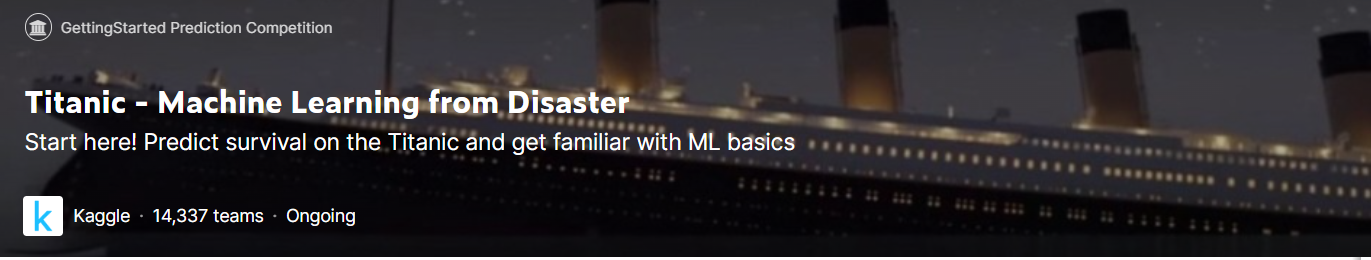

In [1]:
from IPython.display import Image
Image(filename='Titanic.png') 

In [2]:
import numpy as np
import pandas as pd

In [3]:
#data.sort_values(by=['Pclass'])

In [4]:
data= pd.read_csv('train.csv')


In [5]:
#data= pd.read_csv('test.csv')

In [6]:
data.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [7]:
test_data = pd.read_csv('test.csv')

In [8]:
test_data#data['Pclass']

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [9]:
women =  data.loc[data.Sex =='female']['Survived']
rate_women =sum(women)/len(women) #len() returns the total count of women
#sum() returns only the count of female passengers who survived.
print("% of women who survived:",rate_women)

% of women who survived: 0.7420382165605095


In [10]:
men = data.loc[data.Sex=='male']['Survived']
rate_men= sum(men)/len(men)
print("% men who survived:",rate_men)

% men who survived: 0.18890814558058924


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
y = data['Survived']
features = ["Pclass","Sex","SibSp","Parch"]

X = pd.get_dummies(data[features])
x_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators= 100,max_depth =5,random_state=1)
model.fit(X,y)
predictions =model.predict(x_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")



Your submission was successfully saved!
